# Jan 12th, 2021 (voxel sz plots)

**Motivation**: Testing new reg.get_accepted_regions() function, plotting distribution of # voxels per ROIs.  <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
# mice = Mice(Config(128, 0, 100), full_load=True, load_parcel=True, load_allen=True)

In [3]:
# mice.parcel.fit_parcel(True)

[PROGRESS] fit columnar: initiated

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


[PROGRESS] kmeans fit: done

[PROGRESS] save 2D 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] fill gaps: done

[PROGRESS] save 3D 10um: done

[PROGRESS] downsample: done

num regions,    left: 384,  right: 384
region id diff,         r - l:  Counter({384: 384})

[PROGRESS] fit columnar: done

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'subcortex-l_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'subcortex-r_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'regions-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'regions-cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'shape_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'shape_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] 'shape_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*0/parcellation

[PROGRESS] save results: done.

In [2]:
mice = Mice(Config(128, 0, 100), full_load=True, load_parcel=True, load_allen=True)

In [3]:
from register.register import *
reg = Register(mice)

In [33]:
# _ = reg.register_anat(save_results=True, anchor_ses=2)

100%|██████████| 10/10 [01:28<00:00,  8.82s/it]


In [4]:
_ = reg.get_accepted_regions(0.1)

Name: cortex . . . a total of: 762 regions accepted, 6 regions rejected.
accept ratio: 99.22 %, reject ratio: 0.78 %, using a presence threshold of 10.0 %

Name: subcortex . . . a total of: 154 regions accepted, 1 regions rejected.
accept ratio: 99.35 %, reject ratio: 0.65 %, using a presence threshold of 10.0 %

In [5]:
_ = reg.get_accepted_regions(0, 0.1)

Name: cortex . . . a total of: 762 regions accepted, 6 regions rejected.
accept ratio: 99.22 %, reject ratio: 0.78 %, using a presence threshold of 10.0 %

Name: subcortex . . . a total of: 154 regions accepted, 1 regions rejected.
accept ratio: 99.35 %, reject ratio: 0.65 %, using a presence threshold of 10.0 %

In [6]:
output = reg.get_accepted_regions(2, 0.1)

Name: cortex . . . a total of: 734 regions accepted, 34 regions rejected.
accept ratio: 95.57 %, reject ratio: 4.43 %, using a presence threshold of 10.0 %

Name: subcortex . . . a total of: 153 regions accepted, 2 regions rejected.
accept ratio: 98.71 %, reject ratio: 1.29 %, using a presence threshold of 10.0 %

In [7]:
ordered = mice.parcel.rank_order_regions(
    cortex=output['cortex'].get('acc'),
    subcortex=output['subcortex'].get('acc')
)
len(ordered)

1040

In [8]:
734 + 153 * 2

1040

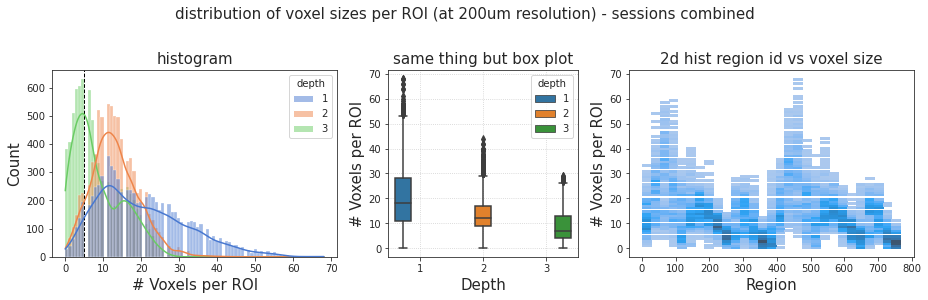

In [9]:
# HIDE CODE


cutoff = 5
_df = output['df'].loc[output['df']['obj'] == 'cortex']
fig, axes = create_figure(1, 3, (13, 4), gridspec_kw={'width_ratios': [1.5, 1, 1.5]})

axes[0].axvline(cutoff, color='k', lw=1, ls='--', label=f"cutoff = {cutoff}")
sns.histplot(data=_df, x='vox', hue='depth', palette='muted', kde=True, ax=axes[0])
sns.boxplot(data=_df, x='depth', y='vox', hue='depth', ax=axes[1])
sns.histplot(data=_df, y='vox', x='region', ax=axes[2])
axes[0].set_xlabel('# Voxels per ROI', fontsize=15)
axes[1].set_ylabel('# Voxels per ROI', fontsize=15)
axes[2].set_ylabel('# Voxels per ROI', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[1].set_xlabel('Depth', fontsize=15)
axes[2].set_xlabel('Region', fontsize=15)
axes[0].set_title('histogram', fontsize=15)
axes[1].set_title('same thing but box plot', fontsize=15)
axes[2].set_title('2d hist region id vs voxel size', fontsize=15)
axes[1].grid()
fig.suptitle(
    'distribution of voxel sizes per ROI (at 200um resolution) - sessions combined', fontsize=15, y=1.03)
plt.show()

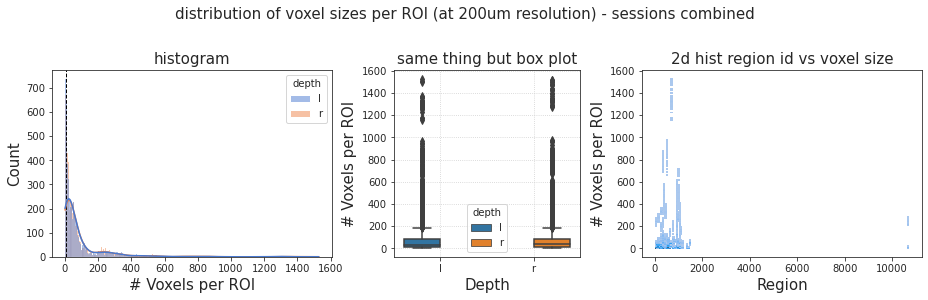

In [10]:
# HIDE CODE


cutoff = 5
_df = output['df'].loc[output['df']['obj'] == 'subcortex']
fig, axes = create_figure(1, 3, (13, 4), gridspec_kw={'width_ratios': [1.5, 1, 1.5]})

axes[0].axvline(cutoff, color='k', lw=1, ls='--', label=f"cutoff = {cutoff}")
sns.histplot(data=_df, x='vox', hue='depth', palette='muted', kde=True, ax=axes[0])
sns.boxplot(data=_df, x='depth', y='vox', hue='depth', ax=axes[1])
sns.histplot(data=_df, y='vox', x='region', ax=axes[2])
axes[0].set_xlabel('# Voxels per ROI', fontsize=15)
axes[1].set_ylabel('# Voxels per ROI', fontsize=15)
axes[2].set_ylabel('# Voxels per ROI', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[1].set_xlabel('Depth', fontsize=15)
axes[2].set_xlabel('Region', fontsize=15)
axes[0].set_title('histogram', fontsize=15)
axes[1].set_title('same thing but box plot', fontsize=15)
axes[2].set_title('2d hist region id vs voxel size', fontsize=15)
axes[1].grid()
fig.suptitle(
    'distribution of voxel sizes per ROI (at 200um resolution) - sessions combined', fontsize=15, y=1.03)
plt.show()

In [11]:
_df['vox'].argmax()

7535

In [12]:
_df.iloc[[7535]]

key 
 obj 
 depth 
 region 
 vox 
 
 
 
 
 26735 
 sub-SLC09_ses-1 
 subcortex 
 l 
 672 
 1529

In [13]:
mice.al.get(672)

{
    'acronym': 'CP',
    'graph_id': 1,
    'graph_order': 573,
    'id': 672,
    'name': 'Caudoputamen',
    'structure_id_path': [997, 8, 567, 623, 477, 485, 672],
    'structure_set_ids': [
        112905828,
        691663206,
        687527945,
        10,
        688152361,
        12,
        184527634,
        112905813,
        167587189,
        114512891,
        114512892
    ],
    'rgb_triplet': [152, 214, 249]
}

In [14]:
reg.set_mode('ca2')
output2d = reg.get_accepted_regions(2, 0.1)

Name: cortex . . . a total of: 174 regions accepted, 594 regions rejected.
accept ratio: 22.66 %, reject ratio: 77.34 %, using a presence threshold of 10.0 %

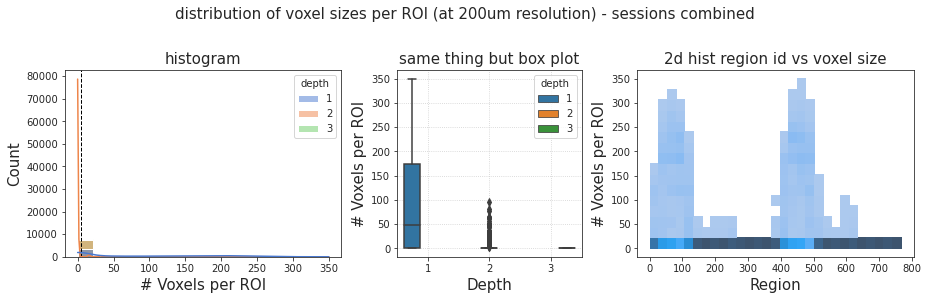

In [15]:
# HIDE CODE


cutoff = 5
_df = output2d['df'].loc[output2d['df']['obj'] == 'cortex']
fig, axes = create_figure(1, 3, (13, 4), gridspec_kw={'width_ratios': [1.5, 1, 1.5]})

axes[0].axvline(cutoff, color='k', lw=1, ls='--', label=f"cutoff = {cutoff}")
sns.histplot(data=_df, x='vox', hue='depth', palette='muted', kde=True, ax=axes[0])
sns.boxplot(data=_df, x='depth', y='vox', hue='depth', ax=axes[1])
sns.histplot(data=_df, y='vox', x='region', ax=axes[2])
axes[0].set_xlabel('# Voxels per ROI', fontsize=15)
axes[1].set_ylabel('# Voxels per ROI', fontsize=15)
axes[2].set_ylabel('# Voxels per ROI', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)
axes[1].set_xlabel('Depth', fontsize=15)
axes[2].set_xlabel('Region', fontsize=15)
axes[0].set_title('histogram', fontsize=15)
axes[1].set_title('same thing but box plot', fontsize=15)
axes[2].set_title('2d hist region id vs voxel size', fontsize=15)
axes[1].grid()
fig.suptitle(
    'distribution of voxel sizes per ROI (at 200um resolution) - sessions combined', fontsize=15, y=1.03)
plt.show()

In [16]:
sorted(collections.Counter(output['df'].loc[output['df']['obj'] == 'cortex', 'vox']).most_common())[:10]

[
    (0, 441),
    (1, 513),
    (2, 681),
    (3, 848),
    (4, 966),
    (5, 1053),
    (6, 1031),
    (7, 1036),
    (8, 975),
    (9, 1110)
]

In [17]:
sorted(collections.Counter(output['df'].loc[output['df']['obj'] == 'subcortex', 'vox']).most_common())[:10]

[
    (0, 176),
    (1, 132),
    (2, 208),
    (3, 225),
    (4, 260),
    (5, 218),
    (6, 187),
    (7, 182),
    (8, 178),
    (9, 151)
]

In [18]:
441 + 176

617

In [19]:
(output['df']['vox']  == 0).sum()

617

In [20]:
key = 'sub-SLC01_ses-1'
_df = output['df'].loc[
    (output['df']['obj'] == 'cortex') &
    (output['df']['key'] == key)
]
_df

key 
 obj 
 depth 
 region 
 vox 
 
 
 
 
 0 
 sub-SLC01_ses-1 
 cortex 
 1 
 1 
 19 
 
 
 1 
 sub-SLC01_ses-1 
 cortex 
 1 
 2 
 22 
 
 
 2 
 sub-SLC01_ses-1 
 cortex 
 1 
 3 
 12 
 
 
 3 
 sub-SLC01_ses-1 
 cortex 
 1 
 4 
 24 
 
 
 4 
 sub-SLC01_ses-1 
 cortex 
 1 
 5 
 7 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 763 
 sub-SLC01_ses-1 
 cortex 
 3 
 764 
 3 
 
 
 764 
 sub-SLC01_ses-1 
 cortex 
 3 
 765 
 3 
 
 
 765 
 sub-SLC01_ses-1 
 cortex 
 3 
 766 
 1 
 
 
 766 
 sub-SLC01_ses-1 
 cortex 
 3 
 767 
 2 
 
 
 767 
 sub-SLC01_ses-1 
 cortex 
 3 
 768 
 1 
 
 
 
 768 rows × 5 columns

In [21]:
cutoff = 2
small = _df.loc[_df['vox'] <= cutoff, 'region'].values
small = np.array(sorted(small))
small_sym = mice.parcel.complement(small)
small

array([128, 138, 234, 244, 250, 251, 254, 255, 261, 264, 266, 268, 275,
       333, 342, 343, 346, 349, 351, 353, 354, 356, 358, 361, 362, 365,
       367, 368, 369, 372, 373, 374, 376, 378, 379, 380, 381, 382, 383,
       497, 512, 522, 635, 639, 645, 648, 650, 659, 666, 679, 739, 740,
       742, 746, 755, 756, 758, 763, 766, 767, 768])

<AxesSubplot:xlabel='vox', ylabel='Count'>

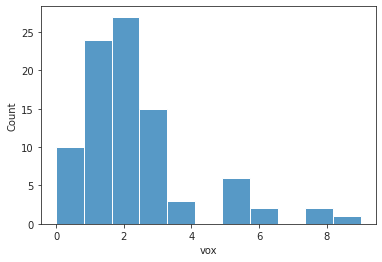

In [22]:
sns.histplot(_df.loc[_df['region'].isin(small_sym), 'vox'])

In [29]:
meta_dir = pjoin
os.listdir(meta_dir)

[
    'SLC_ses-2.csv',
    'SLC_ses-1.csv',
    'temporal_mask.df',
    'SLC_ses-3.csv',
    'SLC_ses-3.df',
    'SLC_ses-1.df',
    'SLC_ses-2.df'
]

In [34]:
tmask_df = pd.read_pickle(pjoin(mice.cfg.base_dir, 'meta_info', 'temporal_mask.df'))

In [35]:
tmask = tmask_df.loc[
    tmask_df['key'] == 'sub-SLC01_ses-1_run-1', 'temporal_mask'].values

In [37]:
len(tmask)

600

[<matplotlib.lines.Line2D object at 0x7e38a6c7fc40>]

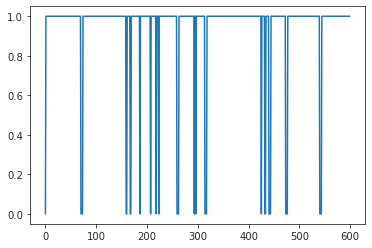

In [38]:
plt.plot(tmask)

In [25]:
x = mice.ca_preproc['sub-SLC04_ses-2_run-3'][:]

In [28]:
x.shape

(256, 250, 6000)

<matplotlib.image.AxesImage object at 0x7f16282cd2e0>

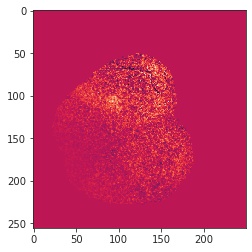

In [43]:
plt.imshow(x[..., 290])

In [47]:
tsnr = x.mean(-1) / x.std(-1)

<matplotlib.image.AxesImage object at 0x7f162811ab50>

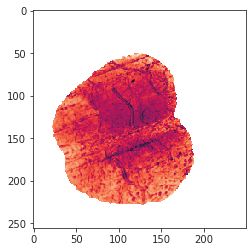

In [48]:
plt.imshow(tsnr)

<AxesSubplot:ylabel='Count'>

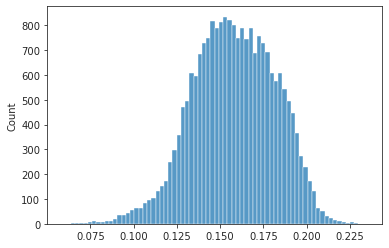

In [50]:
sns.histplot(tsnr_vals)

In [51]:
np.percentile(tsnr_vals, 5)

0.1198538683312614

<matplotlib.image.AxesImage object at 0x7f15af94aa60>

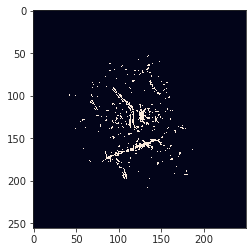

In [54]:
plt.imshow(tsnr <= np.percentile(tsnr_vals, 5))

In [55]:
def low_tsnr_mask(x: np.ndarray, p: float = 5.0, axis: int = -1):
    tsnr = x.mean(axis) / x.std(axis)
    vals = tsnr[np.isfinite(tsnr)]
    mask = tsnr > np.percentile(vals, p)
    return mask, tsnr

In [60]:
m_tsnr, _ = low_tsnr_mask(x=x, p=5)
m_indiv = np.logical_and(m_indiv, m_tsnr)

<matplotlib.image.AxesImage object at 0x7f15afc44f10>

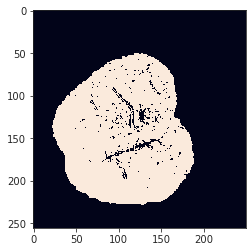

In [61]:
plt.imshow(m_tsnr)

<matplotlib.image.AxesImage object at 0x7f15af927f70>

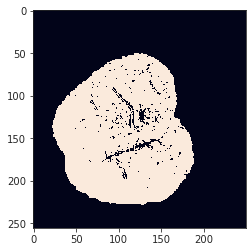

In [62]:
plt.imshow(m_indiv)

In [58]:
indiv = mice.ref['sub-SLC04_ses-2'].load_ants()
m_indiv = mice.mask2d['sub-SLC04_ses-2'].load_ants()
m_indiv = m_indiv.numpy().astype(bool)

<matplotlib.image.AxesImage object at 0x7f15afb95ca0>

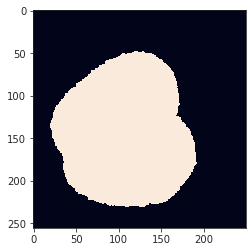

## Did this before

### 128*0

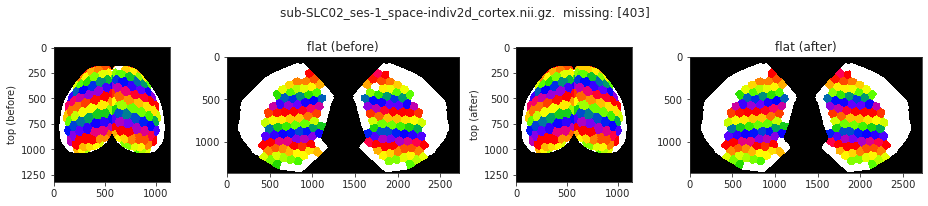

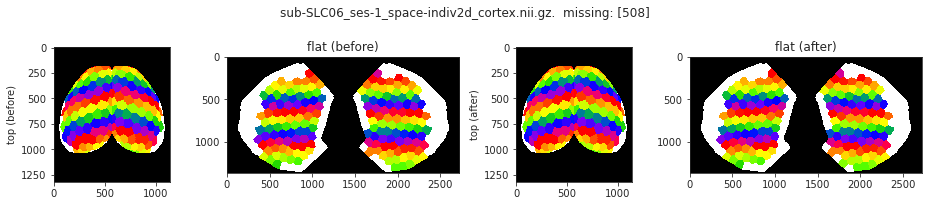

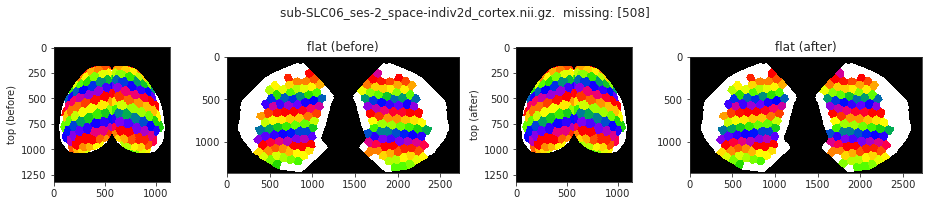

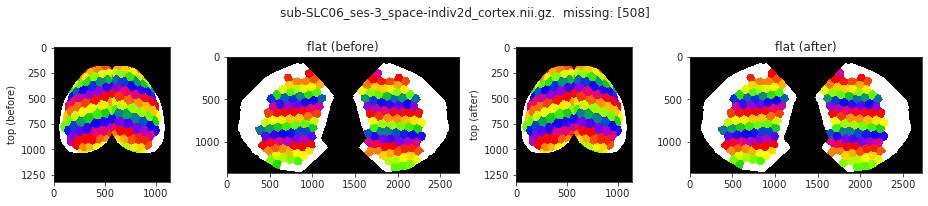

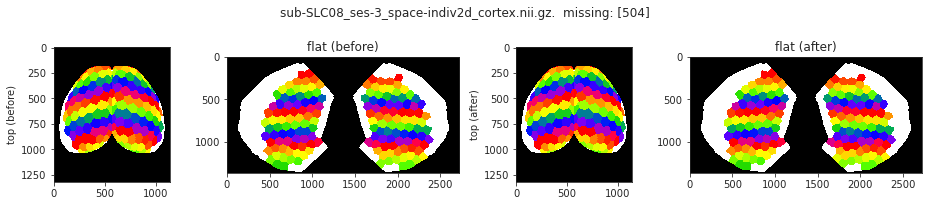

In [29]:
mice.parcel.fill_rois_2d()

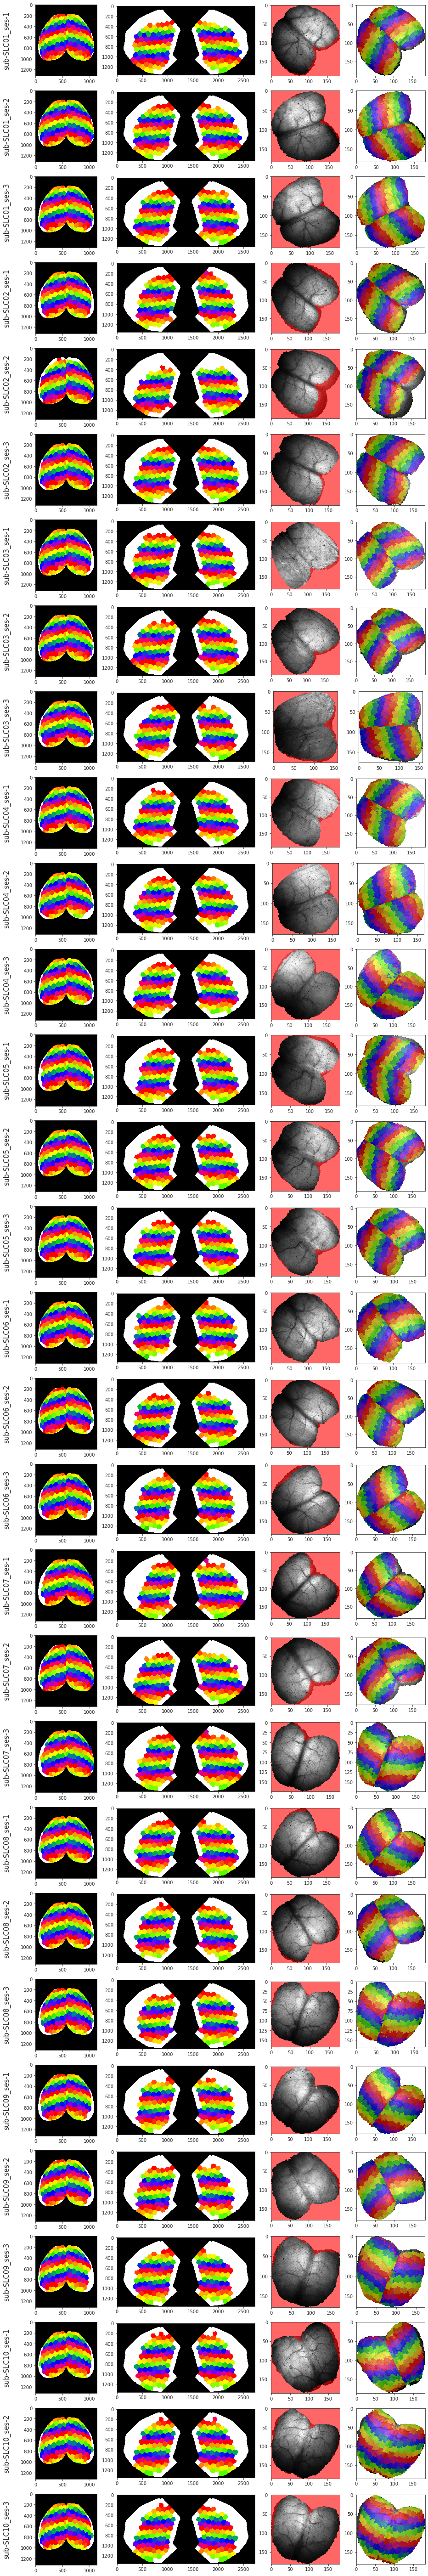

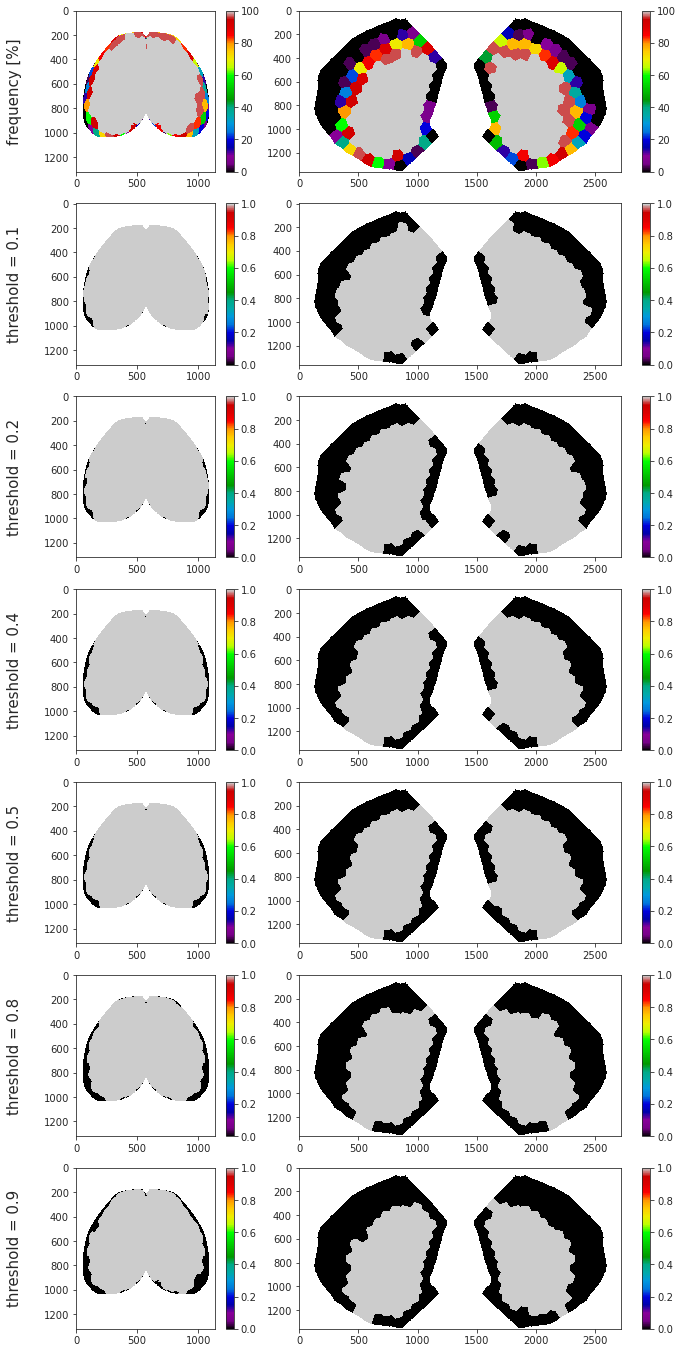

accept ratio: 72 %, reject ratio: 28 %, using a presence threshold of 10.0 %
a total of 198 regions were accepted

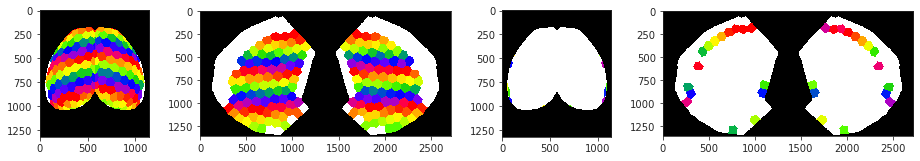

In [31]:
_ = mice.parcel.show_accepted_regions_2d(mice)

### 256*0

In [2]:
mice = Mice(Config(256, 0, 100), full_load=True, load_parcel=True, load_allen=True)

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

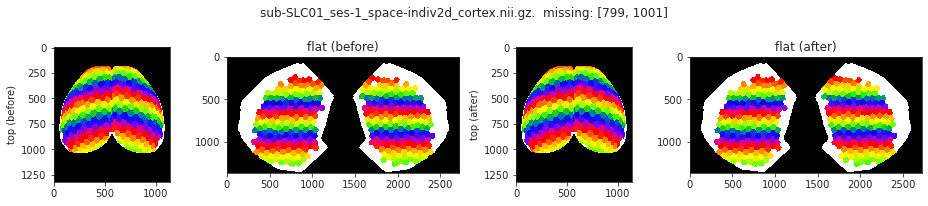

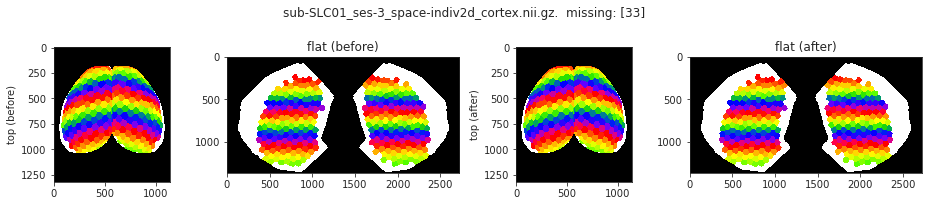

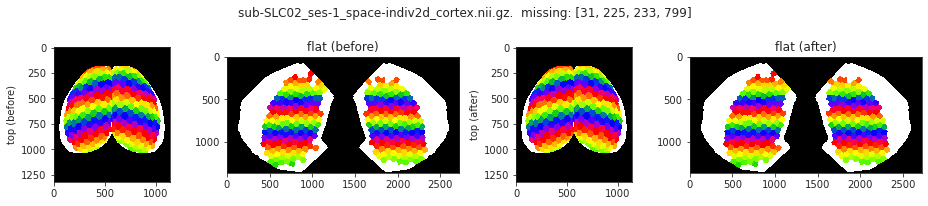

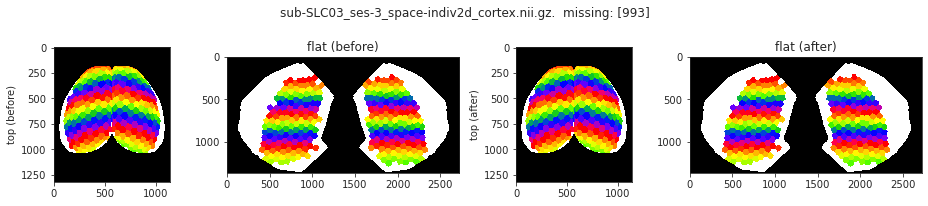

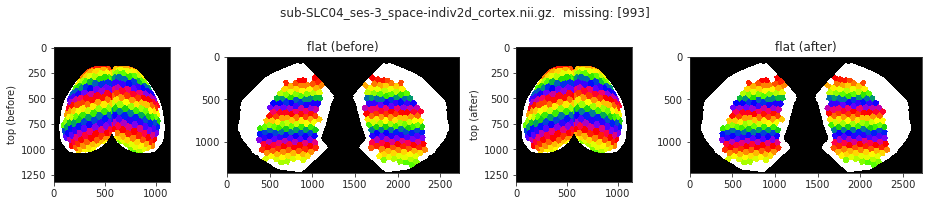

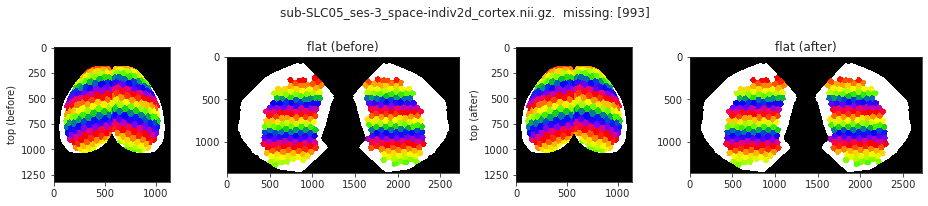

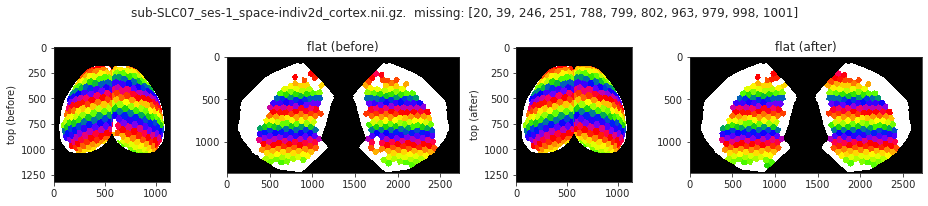

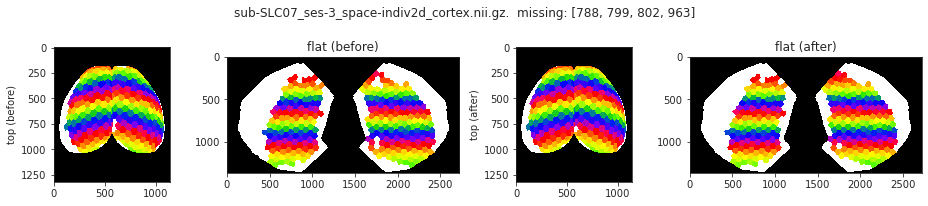

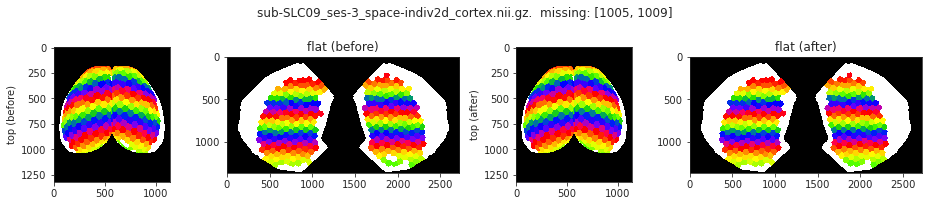

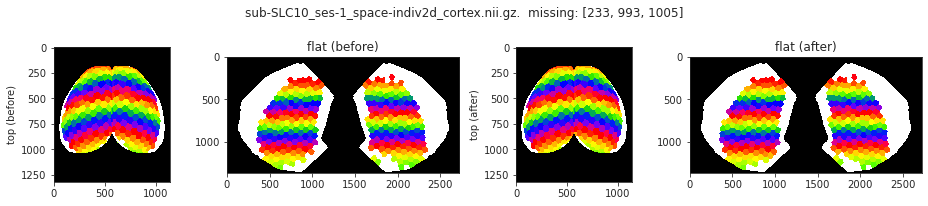

In [3]:
mice.parcel.fill_rois_2d()

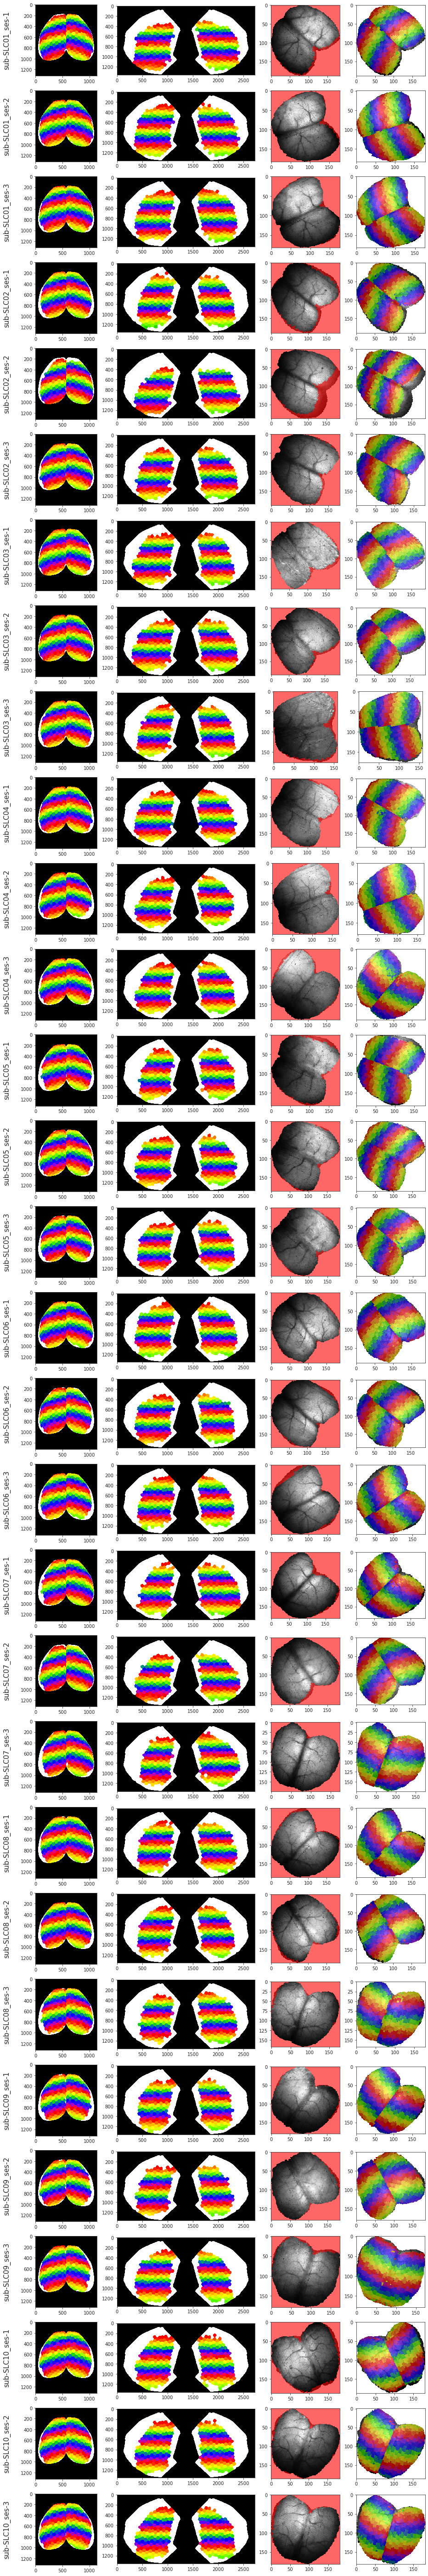

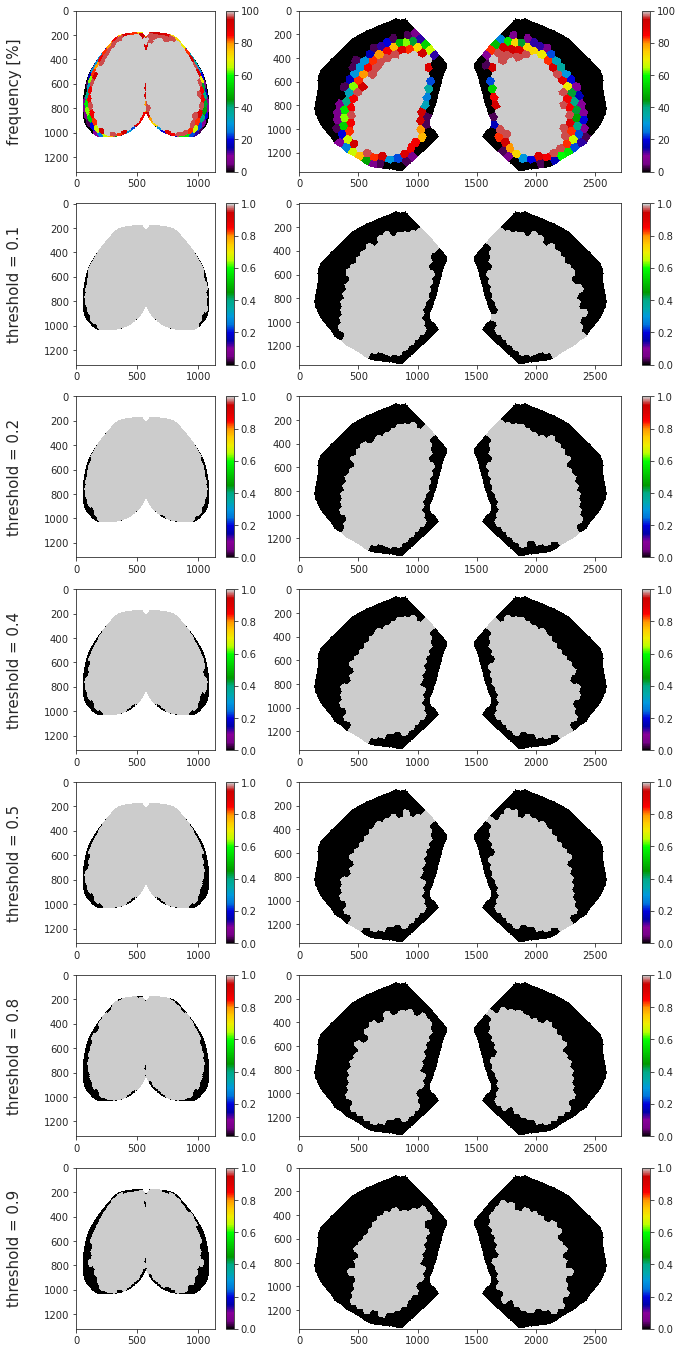

accept ratio: 72 %, reject ratio: 28 %, using a presence threshold of 10.0 %
a total of 362 regions were accepted

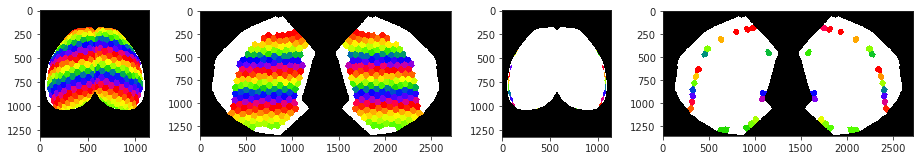

In [4]:
_ = mice.parcel.show_accepted_regions_2d(mice)